In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#filePath = r"D:\Documents\MSc RaC\COMPG0124 Multi-agent Artificial Intelligence\coursework\cw1 group project\data\sample.csv"
filePath = r"D:\Documents\MSc RaC\COMPG0124 Multi-agent Artificial Intelligence\coursework\cw1 group project\data\train.csv"

In [25]:
# Load data into pandas dataframe
df = pd.read_csv(filePath, sep=',',header=0, quotechar='"')

In [26]:
# Split 'useragent' field into 'OS' and 'browser'
dfn = df['useragent'].str.split('_', expand = True)
df['OS'] = dfn[0]
df['browser'] = dfn[1]
# Create slotsize field
df['slotsize'] = df['slotheight'] * df['slotwidth']

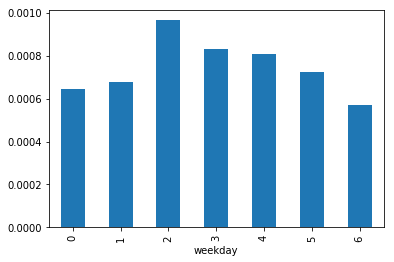

In [27]:
# CTR by weekday
df.groupby('weekday')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

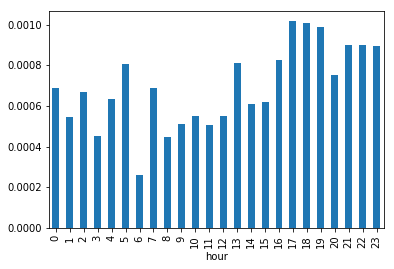

In [28]:
# CTR by hour
df.groupby('hour')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

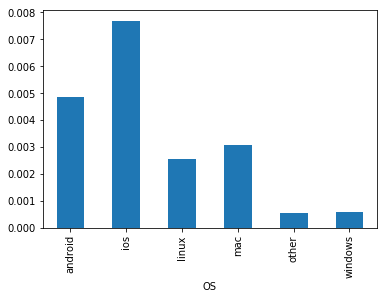

In [29]:
# CTR by OS
df.groupby('OS')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

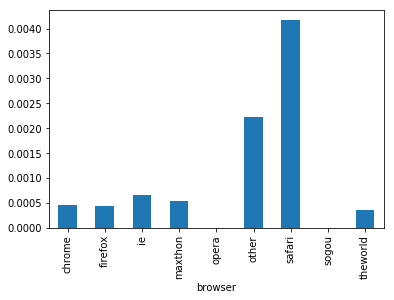

In [30]:
# CTR by Browser
df.groupby('browser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

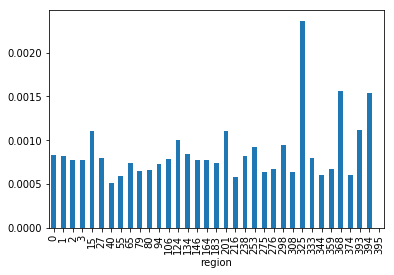

In [32]:
# CTR by region
df.groupby('region')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

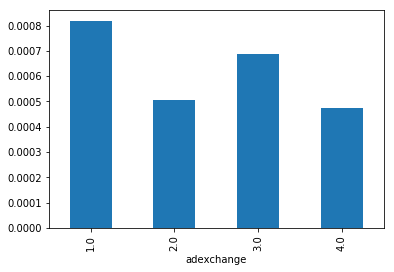

In [33]:
# CTR by adexchange
df.groupby('adexchange')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

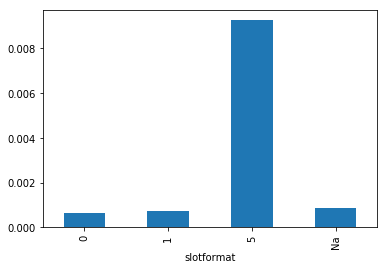

In [36]:
# CTR by slotformat
df.groupby('slotformat')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

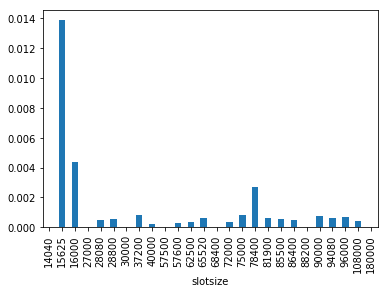

In [37]:
# CTR by slotformat
df.groupby('slotsize')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')

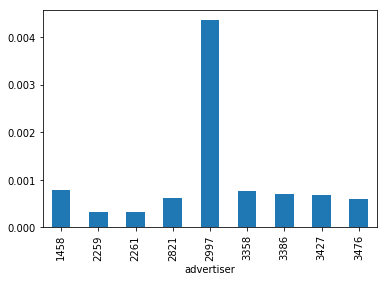

In [38]:
# CTR by slotformat
df.groupby('advertiser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')